<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
    

</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>


# 1. ¿Cuál es la mejor tarifa?

El proyecto de la empresa Megaline consiste en analizar los planes que tienen con sus tarifas respectivas, con una muestra relativamente pequeña, de 500 clientes, y con la información de quienes son, de que ciudad, que plan usan, que llamadas hicieron, mensajes de textos enviados y el uso de internet en el año 2018. En base a esto se pretende indicar que plan le genera más ingresos a Megaline. Se necsita en primer lugar cargar todas las bases de datos, limpiar los datos que se presenten, realiza gráficos basados en estadística descriptiva, y formular hipótesis para poder comprobar o rechazar.

## Inicialización

In [1]:
# Se Cargan todas las librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st


## Cargar datos

In [2]:
# Se Carga los archivos de datos en diferentes DataFrames
df_calls=pd.read_csv('/datasets/megaline_calls.csv')
df_internet=pd.read_csv('/datasets/megaline_internet.csv')
df_messages=pd.read_csv('/datasets/megaline_messages.csv')
df_plans=pd.read_csv('/datasets/megaline_plans.csv')
df_users=pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

Los datos para este proyecto se dividen en varias tablas. Se explora cada una para tener una comprensión inicial de los datos. Si es necesario, se realizarán las correcciones requeridas en cada tabla. Para este proceso se utiliza .head(), .info() y .shape()

## Tarifas

In [3]:
# Se Imprime la información general/resumida sobre el DataFrame de las tarifas

print(df_plans.head())
print(df_plans.info())
print(df_plans.shape)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   pla

# Imprime una muestra de los datos para las tarifas

No es necesario imprimir una muestra de los datos del DF Tarifas ya que con la informacion anterior, mediante .head, .info y .shape se obtuvo todos los datos. Se observa que son solo 2 filas y 8 columnas.


## Corregir datos

A pesar de que a simple vista se observa que los datos no contienen ningún valor duplicado ni ausente, se procede con la comprobación mediante .isna() y .duplicated, y se comprueba que no hay nada que corregir.

In [4]:
print(df_plans.isna().sum())
print(df_plans.duplicated().sum())

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64
0


## Enriquecer los datos

Se va a regresar a este punto si durante el análisis del resto del proyecto fuere necesario. Dado lo contrario, no es necesario añadir ningún otro dato a esta tabla de tarifas.

## Usuarios/as

In [5]:
# Se Imprime la información general/resumida sobre el DataFrame de usuarios

print(df_users.head())
print(df_users.info())
print(df_users.shape)

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    

In [6]:
# Se Imprime una muestra de datos para usuarios
print(df_users.head(15))


    user_id first_name  last_name  age  \
0      1000   Anamaria      Bauer   45   
1      1001     Mickey  Wilkerson   28   
2      1002     Carlee    Hoffman   36   
3      1003   Reynaldo    Jenkins   52   
4      1004    Leonila   Thompson   40   
5      1005      Livia    Shields   31   
6      1006     Jesusa   Bradford   73   
7      1007    Eusebio      Welch   42   
8      1008      Emely    Hoffman   53   
9      1009      Gerry     Little   19   
10     1010     Wilber      Blair   52   
11     1011     Halina      Henry   73   
12     1012    Jonelle    Mcbride   59   
13     1013    Nicolas     Snider   50   
14     1014    Edmundo      Simon   61   

                                         city    reg_date      plan  \
0       Atlanta-Sandy Springs-Roswell, GA MSA  2018-12-24  ultimate   
1             Seattle-Tacoma-Bellevue, WA MSA  2018-08-13      surf   
2        Las Vegas-Henderson-Paradise, NV MSA  2018-10-21      surf   
3                               Tulsa, OK M

Para empezar con el análisis del DF users, se hace uso de .heaad, .info y .shape. Con esto se sabe que hay 500 filas con datos de 8 columnas. No se encuentran valores no nulos en las columnas, a excepción de la columna churn_date, ya que como se explica, habrá valores ausentes debido a la fecha de extracción de la base de datos. Es por esto que en esta columna se pueden hallar 34 valores NaN.
Con una impresión de una muestra un poco más amplia de 15 filas se puede evidenciar datos que si tienen su fecha en la columna churn_date, y los demás con NaN según corresponde.
En la descripción del proyecto nos indica que el formato de la fecha es (dd, mm, aa), pero al ver la tabla de datos está con formato (aa, mm, dd), está en el formato universal así que lo dejamos de esta manera. 

### Corregir los datos

Se analiza a continuación si es necesaria alguna corrección con números ausentes y duplicados. Se puede observar que no hay ningún dato que necesitemos reemplazar o eliminar. Solo se compueba que hay 466 datos duplicados(NaN), que corresponde a la explicación de la fecha de extracción de los datos y los 34 faltantes son los que si muestran una fecha exacta. Con esto podemos ver que el tipo de datos es object, pero dado que tenemos fechas y posteriormente tal vez se necesite usarlas para el análisis, debemos cambiar al tipo datetime.

In [7]:
print(df_users.isna().sum())
print(df_users.duplicated().sum())

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64
0


In [8]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])
print(df_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


Se cambia el tipo de datos en la columna reg_date y en churn_date, por medio de pd.to_datetime. Para comprobar que se ha cambiado correctamente, se imprime info y se corrobora que el cambio esta hecho.

### Enriquecer los datos

Se va a regresar a este punto si durante el análisis del resto del proyecto fuere necesario. Dado lo contrario, no es necesario añadir ningún otro dato a esta tabla de users.

## Llamadas

In [9]:
# Se Imprime la información general/resumida sobre el DataFrame de las llamadas

print(df_calls.head())
print(df_calls.info())
print(df_calls.shape)

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None
(137735, 4)


In [10]:
# Se Imprime una muestra de datos para las llamadas
print(df_calls.head(20))


          id  user_id   call_date  duration
0    1000_93     1000  2018-12-27      8.52
1   1000_145     1000  2018-12-27     13.66
2   1000_247     1000  2018-12-27     14.48
3   1000_309     1000  2018-12-28      5.76
4   1000_380     1000  2018-12-30      4.22
5   1000_388     1000  2018-12-31      2.20
6   1000_510     1000  2018-12-27      5.75
7   1000_521     1000  2018-12-28     14.18
8   1000_530     1000  2018-12-28      5.77
9   1000_544     1000  2018-12-26      4.40
10  1000_693     1000  2018-12-31      4.31
11  1000_705     1000  2018-12-31     12.78
12  1000_735     1000  2018-12-29      1.70
13  1000_778     1000  2018-12-28      3.29
14  1000_826     1000  2018-12-26      9.96
15  1000_842     1000  2018-12-27      5.85
16    1001_0     1001  2018-09-06     10.06
17    1001_1     1001  2018-10-12      1.00
18    1001_2     1001  2018-10-17     15.83
19    1001_4     1001  2018-12-05      0.00


Se imprime la información de esta tabla, obteniendo que es un data frame bastante extenso en cuato a filas, con solo 4 columnas. Se imprime una muestra de 15 filas para tener una idea más amplia de como está conformada esta información. Tenemos datos enteros, float y formato fecha. A continuación se analiza si hay algún dato duplicado o ausente en esta gran cantidad de filas. 

### Corregir los datos

Se analiza si hay datos duplicados o ausentes por medio de .isna y .duplicated, no se encuentra ninguno de estos datos. Se continua con el analisis.

In [11]:
print(df_calls.isna().sum())
print(df_calls.duplicated().sum())

id           0
user_id      0
call_date    0
duration     0
dtype: int64
0


En el data frame de calls también se observa una columna que tiene formato de fechas pero su tipo aparece como object, lo cual puede ser un problema después para trabajarlo, asi que se cambia a tipo datetime y se comprueba que esté hecho el cambio con .info()

In [12]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
print(df_calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None


### Enriquecer los datos

Se va a regresar a este punto si durante el análisis del resto del proyecto fuere necesario. Dado lo contrario, no es necesario añadir ningún otro dato a esta tabla de calls.

## Mensajes

In [13]:
# Se Imprime la información general/resumida sobre el DataFrame de los mensajes

print(df_messages.head())
print(df_messages.info())
print(df_messages.shape)

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
(76051, 3)


In [14]:
# Se Imprime una muestra de datos para los mensajes
print(df_messages.head(15))


          id  user_id message_date
0   1000_125     1000   2018-12-27
1   1000_160     1000   2018-12-31
2   1000_223     1000   2018-12-31
3   1000_251     1000   2018-12-27
4   1000_255     1000   2018-12-26
5   1000_346     1000   2018-12-29
6   1000_386     1000   2018-12-30
7   1000_413     1000   2018-12-31
8   1000_502     1000   2018-12-27
9   1000_525     1000   2018-12-28
10  1000_567     1000   2018-12-25
11    1001_1     1001   2018-11-14
12    1001_2     1001   2018-08-17
13    1001_5     1001   2018-12-05
14    1001_7     1001   2018-11-28


Se imprime la información de esta tabla, obteniendo que es un data frame con más de 70mil entradas, con solo 3 columnas. Se imprime una muestra de 15 filas para tener una idea más amplia de como está conformada esta información. Tenemos datos enteros, object y formato fecha. A continuación se analiza si hay algún dato duplicado o ausente en esta gran cantidad de filas. 

### Corregir los datos

Se analiza si hay algún dato por corregir, por medio de .isna() y .duplicated(), no se encuentra ningún dato por ser eliminado o reemplazado.

In [15]:
print(df_messages.isna().sum())
print(df_messages.duplicated().sum())

id              0
user_id         0
message_date    0
dtype: int64
0


En el data frame de messages también se observa una columna que tiene formato de fechas pero su tipo aparece como object, lo cual puede ser un problema después para trabajarlo, asi que se cambia a tipo datetime y se comprueba que esté hecho el cambio con .info()

In [16]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
print(df_messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None


### Enriquecer los datos

Se va a regresar a este punto si durante el análisis del resto del proyecto fuere necesario. Dado lo contrario, no es necesario añadir ningún otro dato a esta tabla de messages.

## Internet

In [17]:
# Se Imprime la información general/resumida sobre el DataFrame de internet

print(df_internet.head())
print(df_internet.info())
print(df_internet.shape)

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None
(104825, 4)


In [18]:
# Se Imprime una muestra de datos para el tráfico de internet
print(df_internet.head(15))

          id  user_id session_date  mb_used
0    1000_13     1000   2018-12-29    89.86
1   1000_204     1000   2018-12-31     0.00
2   1000_379     1000   2018-12-28   660.40
3   1000_413     1000   2018-12-26   270.99
4   1000_442     1000   2018-12-27   880.22
5     1001_0     1001   2018-08-24   284.68
6     1001_3     1001   2018-12-09   656.04
7     1001_4     1001   2018-11-04    16.97
8    1001_10     1001   2018-11-27   135.18
9    1001_15     1001   2018-12-13   761.92
10   1001_16     1001   2018-10-28   501.53
11   1001_17     1001   2018-09-05   727.29
12   1001_24     1001   2018-09-05   622.03
13   1001_25     1001   2018-10-14   310.43
14   1001_26     1001   2018-09-17     0.00


Se imprime la información de esta tabla, obteniendo que es un data frame con más de 100mil entradas, es un data frame extenso con solo 4 columnas. Se imprime una muestra de 15 filas para tener una idea más amplia de como está conformada esta información. Tenemos datos enteros, object, float y fecha. A continuación se analiza si hay algún dato duplicado o ausente en esta gran cantidad de filas.

### Corregir los datos

Se analiza si hay algún dato por corregir, por medio de .isna() y .duplicated(), no se encuentra ningún dato por ser eliminado o reemplazado.

In [19]:
print(df_internet.isna().sum())
print(df_internet.duplicated().sum())

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64
0


En el data frame de internet también se observa una columna que tiene formato de fechas pero su tipo aparece como object, lo cual puede ser un problema después para trabajarlo, asi que se cambia a tipo datetime y se comprueba que esté hecho el cambio con .info()

In [20]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
print(df_internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None


### Enriquecer los datos

Se va a regresar a este punto si durante el análisis del resto del proyecto fuere necesario. Dado lo contrario, no es necesario añadir ningún otro dato a esta tabla de internet.

## Estudiar las condiciones de las tarifas

Se imprime nuevamente las condiciones de las tarifas para tener presente en el siguiente analisis.

In [21]:
# Se Imprime las condiciones de la tarifa para tener en cuenta

print(df_plans)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Has hecho algunos cambios correctamente en los conjuntos de datos, sin embargo en la siguiente sección haces más cambios, como el de crear la columna `Month`, recomiendo qeu todos estos cambios se hagan en las secciones anteriores y en la siguiente sección solo se unan los datos sin tener que hacer alguna modificación a los datos originales, de esta manera el trabajo final será más limpio y ordenado
</div>


## Agregar datos por usuario

Una vez cambiado el tipo de datos de object a datetime de las fechas ya se puede extraer la información que se necesita para el análisis a continuación. Se extrae solo month, para calcular el consumo mensual del usuario en mensajes, minutos e internet. Por medio de .dt.month ya se lo puede usar como nueva columna para hacer los cálculos. Ahora con los datos limpios, se calcula el número de llamadas hechas mensualmente por cada usuario para poder entender de mejor manera la información para posterior análisis. 

In [22]:
# Se Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
df_calls['Month'] = df_calls['call_date'].dt.month
calls_user_monthly = df_calls.groupby(['user_id', 'Month'])['id'].count()
print(calls_user_monthly)


user_id  Month
1000     12       16
1001     8        27
         9        49
         10       65
         11       64
                  ..
1498     12       39
1499     9        41
         10       53
         11       45
         12       65
Name: id, Length: 2258, dtype: int64


También se calcula el total de minutos usados mensualmente por cada usuario.

In [23]:
# Se Calcula la cantidad de minutos usados por cada usuario al mes.

df_calls['Month'] = df_calls['call_date'].dt.month
minutes_user_monthly = df_calls.groupby(['user_id', 'Month'])['duration'].sum()
print(minutes_user_monthly)



user_id  Month
1000     12       116.83
1001     8        171.14
         9        297.69
         10       374.11
         11       404.59
                   ...  
1498     12       324.77
1499     9        330.37
         10       363.28
         11       288.56
         12       468.10
Name: duration, Length: 2258, dtype: float64


Se calcula el número de mensajes enviados por cada usuario, al mes.

In [24]:
# Se Calcula el número de mensajes enviados por cada usuario al mes. 


df_messages['Month'] = df_messages['message_date'].dt.month
messages_user_monthly = df_messages.groupby(['user_id', 'Month'])['id'].count()
print(messages_user_monthly)



user_id  Month
1000     12       11
1001     8        30
         9        44
         10       53
         11       36
                  ..
1496     9        21
         10       18
         11       13
         12       11
1497     12       50
Name: id, Length: 1806, dtype: int64


Se calcula el total de GB usados al mes por cada usuario.

In [25]:
# Se Calcula el volumen del tráfico de Internet usado por cada usuario al mes.

df_internet['Month'] = df_internet['session_date'].dt.month
megabytes_user_monthly = df_internet.groupby(['user_id', 'Month'])['mb_used'].sum()
print(megabytes_user_monthly)



user_id  Month
1000     12        1901.47
1001     8         6919.15
         9        13314.82
         10       22330.49
         11       18504.30
                    ...   
1498     12       23137.69
1499     9        12984.76
         10       19492.43
         11       16813.83
         12       22059.21
Name: mb_used, Length: 2277, dtype: float64


Ahora se une toda la información obtenida anteriormente en un solo DataFrame para poder observar de mejor manera el conjunto de datos y proceder con el resto de análisis. Se hace por medio de pd.concat con las columnas base o en común que son user_id y month.

In [26]:
# Se Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

df_consume = pd.concat([calls_user_monthly, minutes_user_monthly, messages_user_monthly, megabytes_user_monthly], axis = 'columns')
df_consume.columns = ['calls_user_monthly', 'minutes_user_monthly', 'messages_user_monthly', 'megabytes_user_monthly']
print(df_consume)

               calls_user_monthly  minutes_user_monthly  \
user_id Month                                             
1000    12                   16.0                116.83   
1001    8                    27.0                171.14   
        9                    49.0                297.69   
        10                   65.0                374.11   
        11                   64.0                404.59   
...                           ...                   ...   
1498    12                   39.0                324.77   
1499    9                    41.0                330.37   
        10                   53.0                363.28   
        11                   45.0                288.56   
        12                   65.0                468.10   

               messages_user_monthly  megabytes_user_monthly  
user_id Month                                                 
1000    12                      11.0                 1901.47  
1001    8                       30.0       

Una vez se tiene la tabla con la información mensual se necesita la información del plan que cada usuario tiene, para lo cual se utiliza .merge con la columna user_id para completar estos datos.

In [27]:
# Se Añade la información de la tarifa
df_columns = df_users[['user_id', 'plan']]
plan_tarifa = df_consume.merge(df_columns, on = 'user_id', how = 'outer')
print(plan_tarifa)


      user_id  calls_user_monthly  minutes_user_monthly  \
0        1000                16.0                116.83   
1        1001                27.0                171.14   
2        1001                49.0                297.69   
3        1001                65.0                374.11   
4        1001                64.0                404.59   
...       ...                 ...                   ...   
2298     1307                 NaN                   NaN   
2299     1319                 NaN                   NaN   
2300     1378                 NaN                   NaN   
2301     1463                 NaN                   NaN   
2302     1473                 NaN                   NaN   

      messages_user_monthly  megabytes_user_monthly      plan  
0                      11.0                 1901.47  ultimate  
1                      30.0                 6919.15      surf  
2                      44.0                13314.82      surf  
3                      53.0        

Con esto se procede a calcular el ingreso mensual que obtiene la empresa por cada usuario, tomando en cuenta lo que cada cliente usó en cuanto a mensajes, minutos e internet comparando con lo que incluye su plan. Como primer paso se necesita realizar un data frame nuevo con la información de lo que incluye cada plan y lo que mensualmente consumió cada usuario. Por medio de .merge con los parámetros left_on y right_on para 'plan' y 'plan_name', y .drop para dejar solo una columna con el nombre del plan.

In [28]:
# Se Calcula el ingreso mensual para cada usuario

df_consumo_final = plan_tarifa.merge(df_plans, left_on = 'plan', right_on = 'plan_name', how = 'left')
print(df_consumo_final.drop('plan', axis='columns'))

      user_id  calls_user_monthly  minutes_user_monthly  \
0        1000                16.0                116.83   
1        1001                27.0                171.14   
2        1001                49.0                297.69   
3        1001                65.0                374.11   
4        1001                64.0                404.59   
...       ...                 ...                   ...   
2298     1307                 NaN                   NaN   
2299     1319                 NaN                   NaN   
2300     1378                 NaN                   NaN   
2301     1463                 NaN                   NaN   
2302     1473                 NaN                   NaN   

      messages_user_monthly  megabytes_user_monthly  messages_included  \
0                      11.0                 1901.47               1000   
1                      30.0                 6919.15                 50   
2                      44.0                13314.82                 5

Se observa que hay algunos datos que ahora aprecen con NaN, debido a que el cálculo ahora es mensual, hay clientes que no usaron mensajes, minutos o internet en algunos meses. Entonces se necesita esto reemplazado por valor 0 para poder realizar el siguientre paso. 

In [29]:
columns_replace = ['calls_user_monthly', 'minutes_user_monthly', 
'messages_user_monthly', 'megabytes_user_monthly']
for col in columns_replace:
    df_consumo_final[col].fillna(0, inplace=True)

print(df_consumo_final.drop('plan', axis='columns'))


      user_id  calls_user_monthly  minutes_user_monthly  \
0        1000                16.0                116.83   
1        1001                27.0                171.14   
2        1001                49.0                297.69   
3        1001                65.0                374.11   
4        1001                64.0                404.59   
...       ...                 ...                   ...   
2298     1307                 0.0                  0.00   
2299     1319                 0.0                  0.00   
2300     1378                 0.0                  0.00   
2301     1463                 0.0                  0.00   
2302     1473                 0.0                  0.00   

      messages_user_monthly  megabytes_user_monthly  messages_included  \
0                      11.0                 1901.47               1000   
1                      30.0                 6919.15                 50   
2                      44.0                13314.82                 5

Una vez completado este paso se procede con el cálculo, se resta del valor incluído en el plan, el número total mensual de llamadas, mensajes de texto y datos; se multiplica el resultado por el valor del plan de llamadas, mensajes de texto y datos y por último se suma la tarifa mensual del plan. Se pone también una condición con el uso de .where para indicar que realice la multuplicación del cobro extra solo si el valor es positivo, es decir si es mayor a 0, si excede en su consumo.

In [30]:

uso_minutos = df_consumo_final['minutes_user_monthly'] - df_consumo_final['minutes_included']
totalprecio_por_minuto = uso_minutos * df_consumo_final['usd_per_minute']
precio_total_minutos = totalprecio_por_minuto.where(uso_minutos > 0, 0)

uso_mensajes = df_consumo_final['messages_user_monthly'] - df_consumo_final['messages_included'] 
totalprecio_por_mensaje = uso_mensajes * df_consumo_final['usd_per_message']
precio_total_mensajes = totalprecio_por_mensaje.where(uso_mensajes > 0, 0)

uso_gigabytes = df_consumo_final['megabytes_user_monthly'] - df_consumo_final['mb_per_month_included']
uso_gigabytes_convertido = uso_gigabytes / 1024
totalprecio_por_gigabyte = uso_gigabytes_convertido * df_consumo_final['usd_per_gb']
precio_total_gigabytes = totalprecio_por_gigabyte.where(uso_gigabytes > 0, 0)

df_uso_total = [uso_minutos, uso_mensajes, uso_gigabytes]
df_precioextra_total = [totalprecio_por_minuto, totalprecio_por_mensaje, totalprecio_por_gigabyte]
ingreso_x_usuario = precio_total_minutos + precio_total_mensajes + precio_total_gigabytes + df_consumo_final['usd_monthly_pay']


print(ingreso_x_usuario)


0       70.000000
1       20.000000
2       20.000000
3       88.161191
4       50.706055
          ...    
2298    20.000000
2299    20.000000
2300    20.000000
2301    70.000000
2302    20.000000
Length: 2303, dtype: float64



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Buena manera de agregar los datos por usuario, ahora tenemos columnas extras que nos ayudarán con el analisis posterior
</div>


## Estudia el comportamiento de usuario

En la siguiente parte se procede con lo que es estadística descriptiva para los datos agregados y fusionados que se obtuvo en el paso anterior. Se obtienen gráficos útiles para facilitar la comprensión. Y se calcula en base a la tarifa para su posteriro comparación y conclusión.

### Llamadas

plan      month
surf      1        6.428000
          2        6.906175
          3        6.696919
          4        6.799918
          5        6.769200
          6        6.846812
          7        6.721710
          8        6.726164
          9        6.728684
          10       6.722302
          11       6.759115
          12       6.836607
ultimate  1        6.541518
          2        6.517230
          3        6.210906
          4        6.659990
          5        6.662443
          6        6.705188
          7        6.879085
          8        6.613484
          9        6.770040
          10       6.665850
          11       6.742506
          12       6.671929
Name: duration, dtype: float64
plan
surf        6.767264
ultimate    6.699939
Name: duration, dtype: float64


<AxesSubplot:title={'center':'Duración Promedio de llamada'}, xlabel='plan', ylabel='Tiempo'>

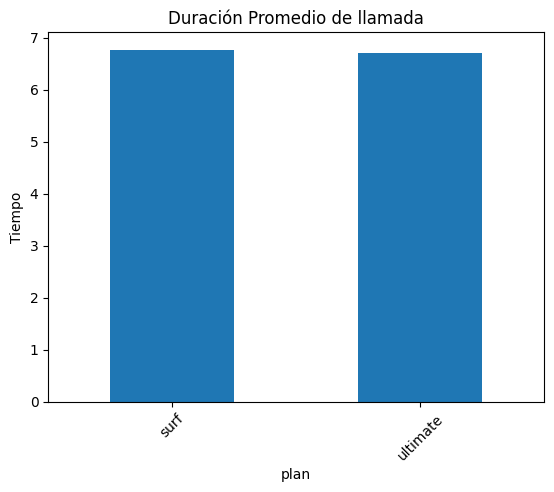

In [31]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

df_duracion_llamadas = df_calls.merge(df_users[['user_id', 'plan']], on='user_id', how='left')
df_duracion_llamadas['month'] = df_duracion_llamadas['call_date'].dt.month

duracion_promedio = df_duracion_llamadas.groupby(['plan', 'month'])['duration'].mean()
print(duracion_promedio)
promedio_llamadas = df_duracion_llamadas.groupby('plan')['duration'].mean()
print(promedio_llamadas)
promedio_llamadas.plot(title= 'Duración Promedio de llamada', kind = 'bar', ylabel= 'Tiempo', rot=45)

La duración promedio de llamas mensuales en el plan Surf es de 6.7672 que comparado con el plan ultimate es de 6.6999. En el gráfico se puede observar claramente que no representa una diferencia significativa el promedio de llamadas que realizan los clientes que tienen un plan o el otro. 

1       171.14
2       297.69
3       374.11
4       404.59
5       392.93
         ...  
2295      0.00
2298      0.00
2299      0.00
2300      0.00
2302      0.00
Name: minutes_user_monthly, Length: 1579, dtype: float64


Text(0.5, 1.0, 'Consumo mensual minutos - Surf')

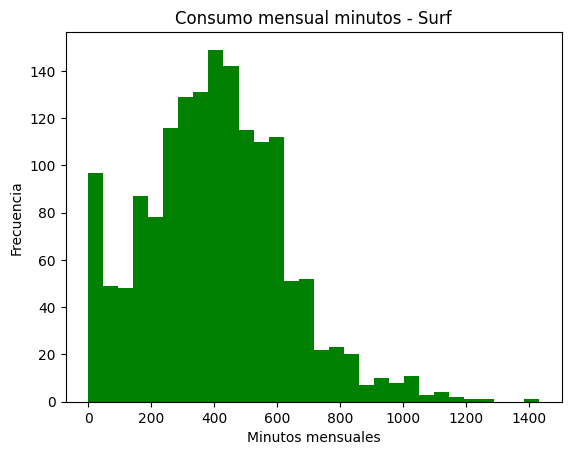

In [32]:


# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

total_minutos_surf = df_consumo_final[df_consumo_final['plan_name'] == 'surf']['minutes_user_monthly']
print(total_minutos_surf)

plt.hist(total_minutos_surf, bins=30, color = 'green')
plt.xlabel('Minutos mensuales')
plt.ylabel('Frecuencia')
plt.title('Consumo mensual minutos - Surf')



Se observa por medio del histograma, que la media de minutos que los usuarios usan mensualmente es 400 minutos en el plan Surf. Es un gráfico sesgado a la derecha. La mayor cantitdad de clientes usan 600 minutos o menos en el mes, hay poca concentración de usuarios que usa. una cantidad más alta.

0       116.83
19        9.32
20       54.79
26      450.21
27      422.81
         ...  
2277    276.53
2293      0.00
2296      0.00
2297      0.00
2301      0.00
Name: minutes_user_monthly, Length: 724, dtype: float64


Text(0.5, 1.0, 'Consumo mensual minutos - Ultimate')

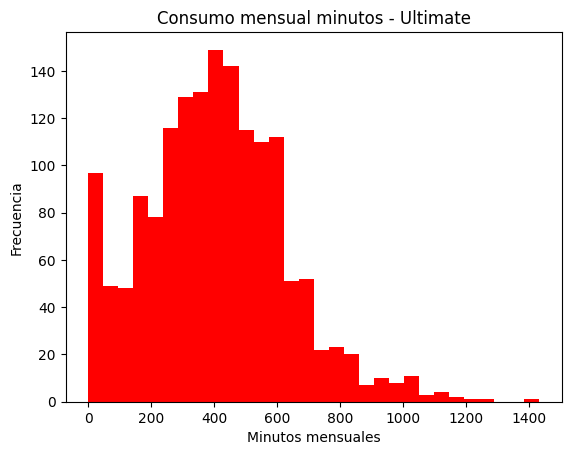

In [33]:
total_minutos_ultimate = df_consumo_final[df_consumo_final['plan_name'] == 'ultimate']['minutes_user_monthly']
print(total_minutos_ultimate)

plt.hist(total_minutos_surf, bins=30, color = 'red')
plt.xlabel('Minutos mensuales')
plt.ylabel('Frecuencia')
plt.title('Consumo mensual minutos - Ultimate')

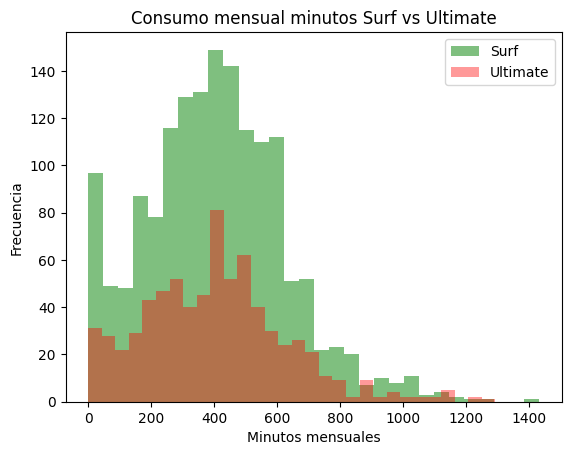

In [34]:


plt.hist(total_minutos_surf, bins=30, color = 'green', label='Surf', alpha=0.5)
plt.hist(total_minutos_ultimate, bins=30, color = 'red', label='Ultimate', alpha=0.4)
plt.xlabel('Minutos mensuales')
plt.ylabel('Frecuencia')
plt.title('Consumo mensual minutos Surf vs Ultimate')
plt.legend()


En este grafico se puede evidenciar el plan Surf y el plan Ultimate, ambos con una media de 400 minutos mensuales y con un sesgo a la derecha,se observan ciertos picos un poco más altos de Ultimate en los valores más altos de minutos. Pero también se observa que hay menos clientes en este plan, vemos las barras más pequeñas en el eje de frecuencia.

In [35]:

# Calcula la media y la varianza de la duración mensual de llamadas.

df_duracion_llamadas = df_calls.merge(df_users[['user_id', 'plan']], on='user_id', how='left')
df_duracion_llamadas['month'] = df_duracion_llamadas['call_date'].dt.month

duracion_mensual = df_duracion_llamadas.groupby(['plan', 'month'])['duration'].mean()

media_llamadas = df_duracion_llamadas.groupby('plan')['duration'].mean()
print(f"La media por plan es: {media_llamadas}")

print()

df_duracion_llamadas = df_calls.merge(df_users[['user_id', 'plan']], on='user_id', how='left')
df_duracion_llamadas['month'] = df_duracion_llamadas['call_date'].dt.month

duracion_mensual = df_duracion_llamadas.groupby(['plan', 'month'])['duration'].var()


varianza_llamadas = df_duracion_llamadas.groupby('plan')['duration'].var()

print(f"La varianza por plan es : {varianza_llamadas}")



La media por plan es: plan
surf        6.767264
ultimate    6.699939
Name: duration, dtype: float64

La varianza por plan es : plan
surf        34.156978
ultimate    33.964578
Name: duration, dtype: float64


La media de la duración de llamadas mensuales en el plan Surf es 6.767264 y en el plan Ultimate es 6.699939
La varianza de la duración de las llamadas mensuales en el plan Surf es 34.156978 y en el plan Ultimate es 33.964578

Hay una diferencia mínima entre las medias y variaznas de cada plan y al ser valores pequeños, no tienen una gran disoersión ni están muy alejados de la media.

Text(0.5, 0, 'Duración de llamadas (minutos)')

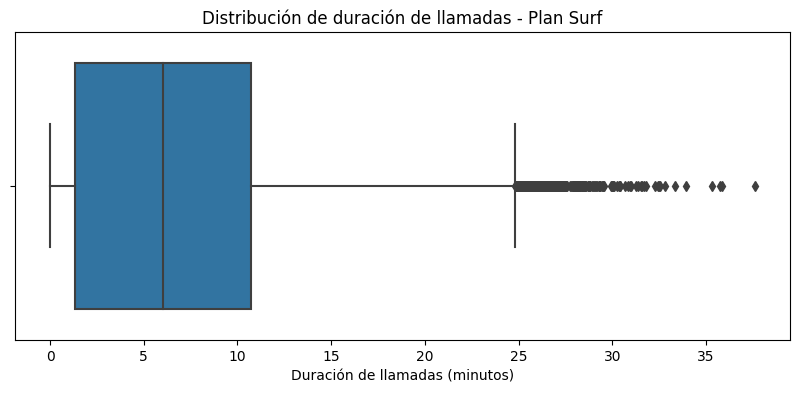

In [36]:

# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(10,4))
sns.boxplot(data=df_duracion_llamadas[df_duracion_llamadas['plan'] == 'surf'], x='duration')
plt.title('Distribución de duración de llamadas - Plan Surf')
plt.xlabel('Duración de llamadas (minutos)')

In [37]:
df_duracion_llamadas[df_duracion_llamadas['plan'] == 'surf']['duration'].describe()

count    94084.000000
mean         6.767264
std          5.844397
min          0.000000
25%          1.320000
50%          6.010000
75%         10.710000
max         37.600000
Name: duration, dtype: float64

Text(0.5, 0, 'Duración de llamadas (minutos)')

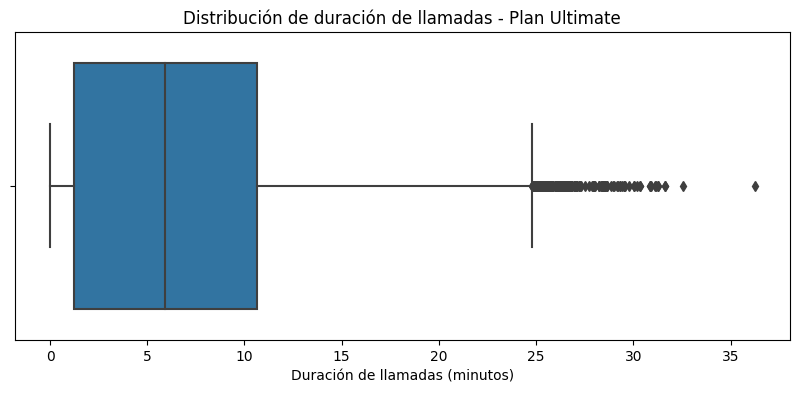

In [38]:

plt.figure(figsize=(10,4))
sns.boxplot(data=df_duracion_llamadas[df_duracion_llamadas['plan'] == 'ultimate'], x='duration')
plt.title('Distribución de duración de llamadas - Plan Ultimate')
plt.xlabel('Duración de llamadas (minutos)')

In [39]:
df_duracion_llamadas[df_duracion_llamadas['plan'] == 'ultimate']['duration'].describe()

count    43651.000000
mean         6.699939
std          5.827914
min          0.000000
25%          1.230000
50%          5.920000
75%         10.660000
max         36.240000
Name: duration, dtype: float64

Este análisis es de los dos gráficos de diagrama de caja de cada uno de los planes. Por medio de .describe se puede obervar de forma númerica la similitud de los dos gráficos y complementar el siguiente análisis. La distancia corta entre el bigote inferior y Q1 indica que el 25% de los datos con valores más bajos están concentrados en un rango estrecho
La distancia larga entre Q3 y el bigote superior revela que el 25% de los datos con valores más altos están dispersos en un rango amplio. Esta característica confirma una distribución sesgada hacia la derecha (asimetría positiva), como se ejemplificó en los histogramas anteriores.
La mayoría de las llamadas tienen duraciones similares y relativamente cortas, ya que se concentran en la parte inferior del diagrama.
Existe un grupo de llamadas más pequeño con duraciones más largas, como se observa en los valores atípicos fuera de los bigotes.
Los valores de mediana, Q1 y Q3 son prácticamente idénticos entre ambos planes, asi como el bigote inferior y superior.
Con este análisis se puede inferir que el tipo de plan no influye significativamente en los patrones de duración de llamadas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de mostrar los datos, se puede ver claramente las tendencias de cada uno de los planes gracias a las gráficas que has utilizado con las cuales podemos revisar aspectos diferentes de los planes
</div>


### Mensajes

plan_name
surf        49014.0
ultimate    27037.0
Name: messages_user_monthly, dtype: float64


<AxesSubplot:title={'center':'Total mensajes mensual'}, xlabel='plan_name', ylabel='Mensajes'>

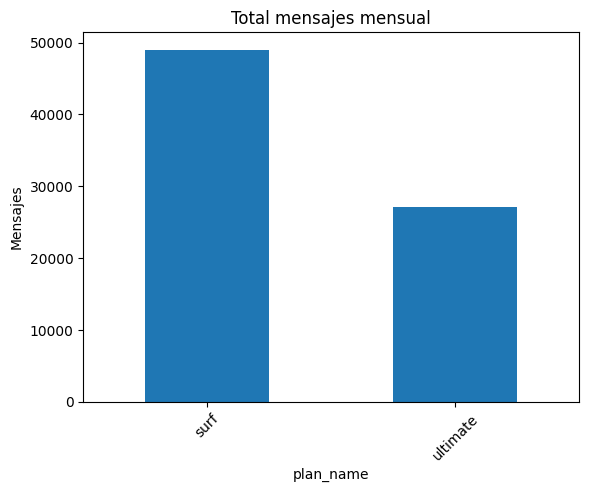

In [40]:

# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

numero_mensajes = df_consumo_final.groupby('plan_name')['messages_user_monthly'].sum()

print(numero_mensajes)
numero_mensajes.plot(title= 'Total mensajes mensual', kind = 'bar', ylabel= 'Mensajes', rot=45)

Se visualiza una mayor diferencia en el total de mensajes enviados por los usuarios en el plan Surf versus el plan Ultimate. Los clientes del plan Surf utilizan más de 40mil mensajes en el mes. Por otro lado los clientes del plan Ultimate usan más de 27mil mensajes mensualmente. 

1       30.0
2       44.0
3       53.0
4       36.0
5       44.0
        ... 
2295     0.0
2298     0.0
2299     0.0
2300     0.0
2302     0.0
Name: messages_user_monthly, Length: 1579, dtype: float64


Text(0.5, 1.0, 'Consumo mensual mensajes - Surf')

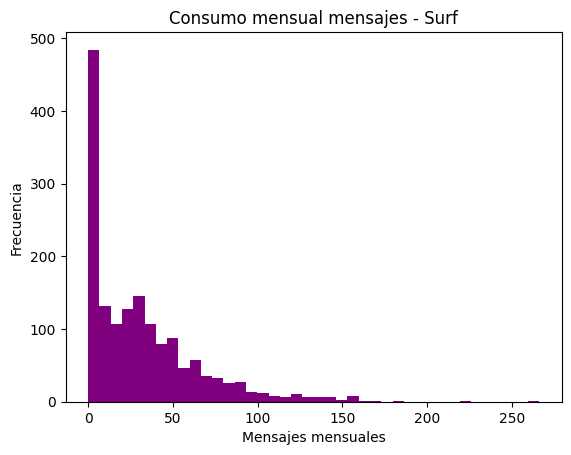

In [41]:
# Compara el número de mensajes mensuales que necesitan los usuarios del plan Surf. Traza un histograma.

total_mensajes_surf= df_consumo_final[df_consumo_final['plan_name'] == 'surf']['messages_user_monthly']
print(total_mensajes_surf)

plt.hist(total_mensajes_surf, bins=40, color = 'purple')
plt.xlabel('Mensajes mensuales')
plt.ylabel('Frecuencia')
plt.title('Consumo mensual mensajes - Surf')

El pico más alto en 0 indica que la mayoría de usuarios no envía mensajes en algunos meses. 
Aproximadamente 100 clientes utilizan entre 10 y 50 mensajes mensuales, muy por debajo de lo que se incluye en su plan que son 50 mensajes. La mayoría de usuarios no aprovechan completamente lo que incluye su plan.

Existe una distribución sesgada hacia la derecha (asimetría positiva) debido a la presencia de valores atípicos en el extremo superior, los valores están concentrados en la parte baja entre 0-50 mensajes, indicando un uso conservador del servicio de mensajes.

Los usuarios del plan Surf subutilizan el servicio de mensajería incluido, los 50 mensajes mensuales es más que suficiente para la mayoría de usuarios, pero también es bueno a pesar de ser pocos, los usuarios con alto consumo generan ingresos adicionales por exceso para la empresa Megaline.

0        11.0
19       15.0
20      139.0
26       21.0
27       37.0
        ...  
2277     50.0
2293      0.0
2296      0.0
2297      0.0
2301      0.0
Name: messages_user_monthly, Length: 724, dtype: float64


Text(0.5, 1.0, 'Consumo mensual mensajes - Ultimate')

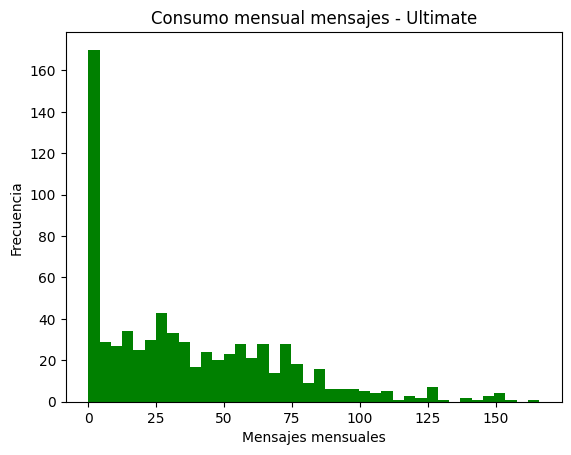

In [42]:
# Compara el número de mensajes mensuales que necesitan los usuarios del plan Ultimate. Traza un histograma.

total_mensajes_ultimate = df_consumo_final[df_consumo_final['plan_name'] == 'ultimate']['messages_user_monthly']
print(total_mensajes_ultimate)

plt.hist(total_mensajes_ultimate, bins=40, color = 'green')
plt.xlabel('Mensajes mensuales')
plt.ylabel('Frecuencia')
plt.title('Consumo mensual mensajes - Ultimate')

En el plan Ultimate también el pico máximo es 0, una proporción significativa de usuarios Ultimate no utiliza mensajes en algunos meses. Se observa un segundo pico alrededor de 40 donde indica el rango de uso más común entre los usuarios con una concentración entre 10-75 mensajes, aproximadamente entre 10 y 40 clientes utilizan este rango de mensajes, muy por debajo del límite de 1000 mensajes incluidos en el plan Ultimate.

La asignación de 1000 mensajes resulta excesiva para las necesidades reales de los usuarios de este plan. 

Distribución sesgada hacia la derecha con valores atípicos, hay pocos o ningún usuario alcanza el límite de 1000 mensajes.

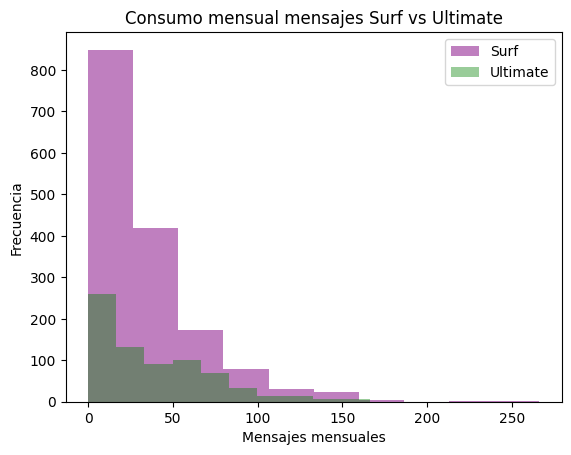

In [43]:
plt.hist(total_mensajes_surf, bins=10, color = 'purple', label='Surf', alpha=0.5)
plt.hist(total_mensajes_ultimate, bins=10, color = 'green', label='Ultimate', alpha=0.4)
plt.xlabel('Mensajes mensuales')
plt.ylabel('Frecuencia')
plt.title('Consumo mensual mensajes Surf vs Ultimate')
plt.legend()

Ahora la comparación de los dos planes, los usuarios del plan Ultimate, con 1000 mensajes incluidos, utilizan aún menos mensajes que los usuarios Surf con 50 mensajes incluidos Ambos muestran concentración en valores bajos y asimetría positiva. La prioridad de los usuarios no es el uso de mensajes en sus planes. 

In [44]:
# Calcula la media y la varianza de la cantidad mensual de mensajes.

mean_surf=df_consumo_final[df_consumo_final['plan_name'] == 'surf']['messages_user_monthly'].mean()
mean_ultimate=df_consumo_final[df_consumo_final['plan_name'] == 'ultimate']['messages_user_monthly'].mean()

print(f"La media de la cantidad mensual de mensajes del plan Surf es {mean_surf}")
print(f"La media de la cantidad mensual de mensajes del plan Ultimate es {mean_ultimate}")

print()

variance_surf=df_consumo_final[df_consumo_final['plan_name'] == 'surf']['messages_user_monthly'].var()
variance_ultimate=df_consumo_final[df_consumo_final['plan_name'] == 'ultimate']['messages_user_monthly'].var()

print(f"La varianza de la cantidad mensual de mensajes del plan Surf es {variance_surf}")
print(f"La varianza de la cantidad mensual de mensajes del plan Ultimate es {variance_ultimate}")



La media de la cantidad mensual de mensajes del plan Surf es 31.041165294490185
La media de la cantidad mensual de mensajes del plan Ultimate es 37.3439226519337

La varianza de la cantidad mensual de mensajes del plan Surf es 1126.1180762077681
La varianza de la cantidad mensual de mensajes del plan Ultimate es 1209.8276117007863


La media del plan Surf es 31.04 y la media del plan Ultimate es 37.34, se observa que hay mayor diferencia entre una y otra y que Ultimate es más alto en este valor. A pesar de que en el análisis anterior se explicó que los usuarios de Ultimate usan menos mensajes que los de Surf, esto es por la cantidad de datos en la tabla y por los valores atípicos que son más altos en Ultimate. En cuanto a la varianza ambos planes tienen un número alto, y más el plan Ultimate, lo que significa que hay una mayor dispersión de los datos, es decir que el consumo de los usuarios se aleja bastante de la media.

Text(0.5, 0, 'Mensajes mensuales')

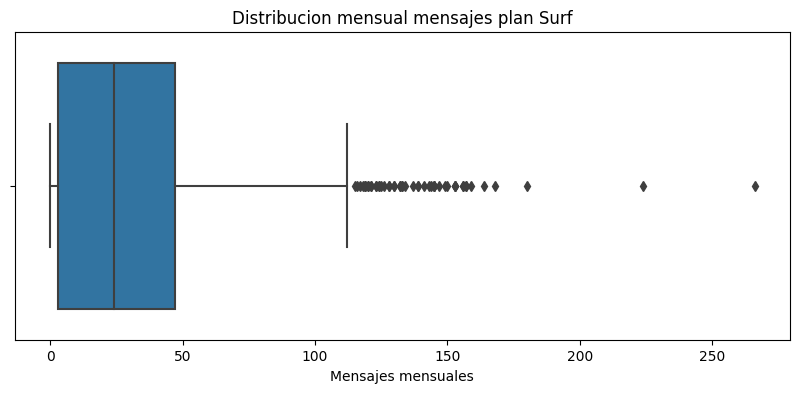

In [45]:
# Traza un diagrama de caja para visualizar la distribución de la cantidad mensual de mensajes
plt.figure(figsize=(10,4))
sns.boxplot(df_consumo_final[df_consumo_final['plan_name'] == 'surf']['messages_user_monthly'])
plt.title('Distribucion mensual mensajes plan Surf')
plt.xlabel('Mensajes mensuales')

In [46]:
df_consumo_final[df_consumo_final['plan_name'] == 'surf']['messages_user_monthly'].describe()

count    1579.000000
mean       31.041165
std        33.557683
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: messages_user_monthly, dtype: float64

Existe un espacio mínimo entre el bigote inferior y Q1 de tan solo 30000 mensajes, esto indica que el 25% de los datos con valores más bajos están totalmente concentrados cerca del valor mínimo, probablemente muchos valores en 0, como se vio en el histograma anterior.
La mediana está alrededor de 25mil, lo que quiere decir que el 50% de los usuarios utiliza 25mil mensajes o menos mensualmente, y por último el Q3 cpn 47mil, indica que el 75% de los usuarios no supera los 50mil mensajes.

Hay un gran espacio entre Q3 y el bigote superior, lo que confirma una asimetría positiva muy pronunciada, hay una gran cantidad de valores atípicos.

Al haber una concentración mayor en la parte inferior del gráfico, se puede indicar que la mayoría de usuarios tiene un consumo muy bajo de mensajes, los usuarios típicos utilizan solo la mitad de su límite mensual. Y existe un grupo minoritario de usuarios con alto consumo que genera ingresos adicionales para Megaline.

Text(0.5, 0, 'Mensajes mensuales')

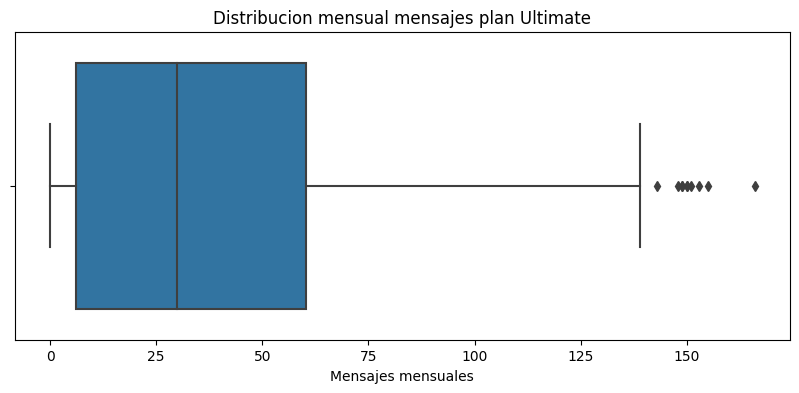

In [47]:
plt.figure(figsize=(10,4))
sns.boxplot(df_consumo_final[df_consumo_final['plan_name'] == 'ultimate']['messages_user_monthly'])
plt.title('Distribucion mensual mensajes plan Ultimate')
plt.xlabel('Mensajes mensuales')

In [48]:
df_consumo_final[df_consumo_final['plan_name'] == 'ultimate']['messages_user_monthly'].describe()

count    724.000000
mean      37.343923
std       34.782576
min        0.000000
25%        6.000000
50%       30.000000
75%       60.250000
max      166.000000
Name: messages_user_monthly, dtype: float64

Se observa una mayor amplitud de la caja, lo que implica un IQR más amplio, la distancia entre Q1 que es 6 y Q3 que es 60 es mayor que en Surf, indicando mayor variabilidad en el rango intercuartílico. Hay un espacio reducido pero presente entre el bigote inferior y Q1, esto indica que hay menos concentración extrema en valores bajos comparado con Surf. La mediana es un poco más alta, 30, pero muy por debajo del límite de 1000.
Para el anális de ambos, Ultimate, siendo el plan más caro con 1000 mensajes, pero los usuarios subutilizan de forma extrema el servicio. Surf siendo un plan más económico con 50 mensajes los usuarios aprovechan mejor su asignación. En plan Ultimate hay usuarios que pagan más pero aún así no usan el servicio. y los valores atípicos generan ingresos adicionales para la empresa.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Buena manera de mostrar los datos de manera similar a `llamadas`, así se mantiene una constancia a lo largo del proyecto
</div>


### Internet

plan_name
surf        26046179.93
ultimate    12394583.78
Name: megabytes_user_monthly, dtype: float64


<AxesSubplot:title={'center':'Total megabytes mensual'}, xlabel='plan_name', ylabel='Megabytes'>

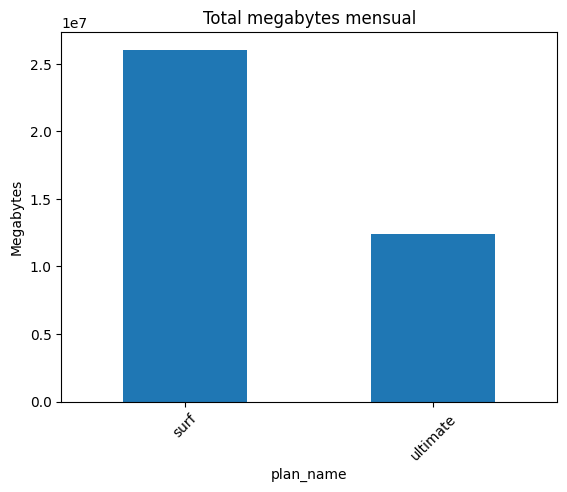

In [49]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

cantidad_megabytes = df_consumo_final.groupby('plan_name')['megabytes_user_monthly'].sum()

print(cantidad_megabytes)
cantidad_megabytes.plot(title= 'Total megabytes mensual', kind = 'bar', ylabel= 'Megabytes', rot=45)


En este gráfico de barras y el total proporcionado de lo que usan los usuarios mensualmente en cada uno de los planes representa un consumo interesante entre los usuarios. 
Para el plan Surf los usuarios utilizan más de 26 millones de MB a pesar de que su plan solo olo incluye 15,360 megabytes
Por otro lado los usuarios del plan Ultimate, utilizan más de 12 millones de MB y su plan incluye 30,720 megabytes.
Vale recalcar que el costo extra para Surf es de 10 dólares por GB en comparación con el plan Ultimate que es de 7 dólares por GB.

Se puede interpretar que los usuarios de Surf sienten que pagan poco, siendo el valor del plan $20, entonces pueden estar más dispuestos a exceder límites percibiendo que tal vez no les sube tanto el precio. Pero esto causa que usen más del doble que las personas de Ultimate.

Los usuarios del plan Ultimate ya pagan un valor alto, $70, entonces puede ser que secuiden más de no sobrepasarse aunque algunos usuarios igual lo hacen.

Este comportamiento confirma que la percepción del valor influye más en el consumo que la capacidad real del plan. Los usuarios de Surf, al sentir que pagan menos, consumen sin restricciones, mientras que los de Ultimate son más conscientes del gasto.

1        6919.15
2       13314.82
3       22330.49
4       18504.30
5       19369.18
          ...   
2295        0.00
2298        0.00
2299        0.00
2300        0.00
2302        0.00
Name: megabytes_user_monthly, Length: 1579, dtype: float64


Text(0.5, 1.0, 'Consumo mensual megabytes - Surf')

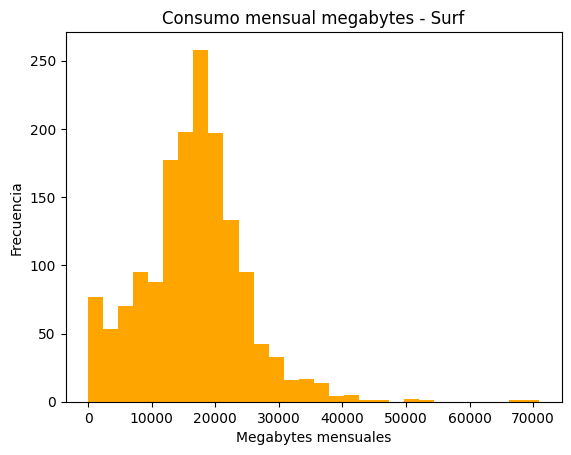

In [50]:
# Compara el número de megabytes mensuales que necesitan los usuarios de cada plan. Traza un histograma.

total_megabytes_surf = df_consumo_final[df_consumo_final['plan_name'] == 'surf']['megabytes_user_monthly']
print(total_megabytes_surf)

plt.hist(total_megabytes_surf, bins=30, color = 'orange')
plt.xlabel('Megabytes mensuales')
plt.ylabel('Frecuencia')
plt.title('Consumo mensual megabytes - Surf')


Hay un pico en 18,000 megabytes, el cual está muy por encima del límite incluido que son 15,000 MB. 
Significa que el comportamiento típico del usuario en el plan Surf es exceder su plan.

Existe una concentración de usuarios en la parte baja de la distribución, creando un sesgo a la derecha, siendo su rango principal entre 0 y 20,500 megabytes.

La mayoría consume dentro de este rango y generan ingreso extra a la empresa.


0        1901.47
19       2068.37
20      32118.82
26      17106.99
27      23676.72
          ...   
2277    11106.55
2293        0.00
2296        0.00
2297        0.00
2301        0.00
Name: megabytes_user_monthly, Length: 724, dtype: float64


Text(0.5, 1.0, 'Consumo mensual megabytes - Ultimate')

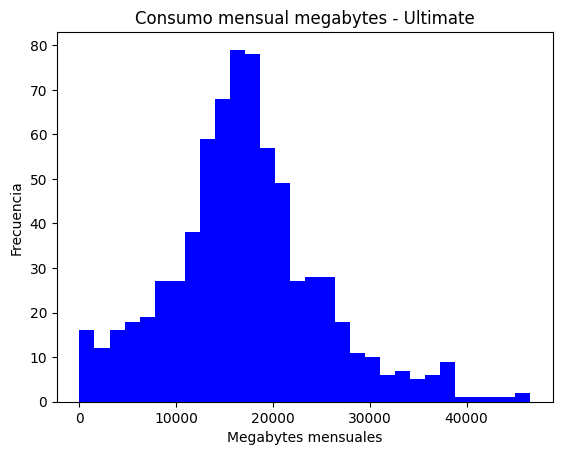

In [51]:
# Compara el número de megabytes mensuales que necesitan los usuarios de cada plan. Traza un histograma.

total_megabytes_ultimate = df_consumo_final[df_consumo_final['plan_name'] == 'ultimate']['megabytes_user_monthly']
print(total_megabytes_ultimate)

plt.hist(total_megabytes_ultimate, bins=30, color = 'blue')
plt.xlabel('Megabytes mensuales')
plt.ylabel('Frecuencia')
plt.title('Consumo mensual megabytes - Ultimate')

Hay un pico principal, entre 18,000 y 20,000 megabytes, este pico está muy cerca del límite incluido en el plan, de 30,000 MB, lo que sugiere que muchos usuarios consumen una cantidad significativa pero se mantienen dentro del límite de su plan.

Se observa un Ssgundo agrupamiento entre 8,000 y 28,000 megabytes, esta distribución más amplia muestra diferentes segmentos de usuarios con patrones de consumo variados, algunos consumen poc otros moderado y otros un valor más alto pero siempre por debajo del límite. 

Hay valores atípicos que generan un sesgo a la derecha, con usuarios que no son un valor representativo pero aún así generan un mayor ingreso para Megaline.

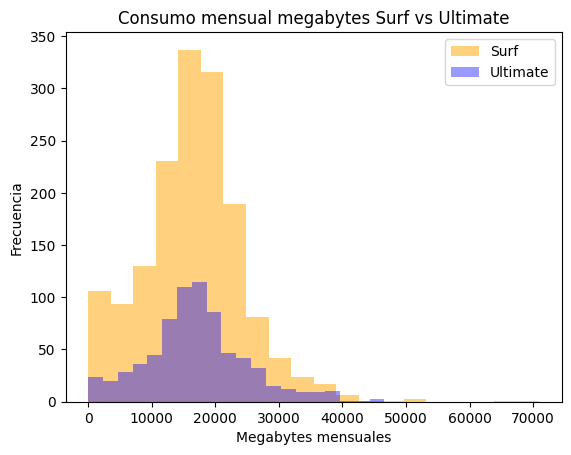

In [52]:
plt.hist(total_megabytes_surf, bins=20, color = 'orange', label='Surf', alpha=0.5)
plt.hist(total_megabytes_ultimate, bins=20, color = 'blue', label='Ultimate', alpha=0.4)
plt.xlabel('Megabytes mensuales')
plt.ylabel('Frecuencia')
plt.title('Consumo mensual megabytes Surf vs Ultimate')
plt.legend()

In [53]:
# Calcula la media y la varianza de la cantidad mensual de megabytes.

mean_surf=df_consumo_final[df_consumo_final['plan_name'] == 'surf']['megabytes_user_monthly'].mean()
mean_ultimate=df_consumo_final[df_consumo_final['plan_name'] == 'ultimate']['megabytes_user_monthly'].mean()

print(f"La media de la cantidad mensual de megabytes del plan Surf es {mean_surf}")
print(f"La media de la cantidad mensual de megabytes del plan Ultimate es {mean_ultimate}")

print()

variance_surf=df_consumo_final[df_consumo_final['plan_name'] == 'surf']['megabytes_user_monthly'].var()
variance_ultimate=df_consumo_final[df_consumo_final['plan_name'] == 'ultimate']['megabytes_user_monthly'].var()

print(f"La varianza de la cantidad mensual de megabytes del plan Surf es {variance_surf}")
print(f"La varianza de la cantidad mensual de megabytess del plan Ultimate es {variance_ultimate}")

La media de la cantidad mensual de megabytes del plan Surf es 16495.364110196326
La media de la cantidad mensual de megabytes del plan Ultimate es 17119.59085635359

La varianza de la cantidad mensual de megabytes del plan Surf es 65010762.83183702
La varianza de la cantidad mensual de megabytess del plan Ultimate es 62941678.23207424


Se obtiene una media de 16495.364110196326 en el plan surf y una media de 17119.59085635359 en el plan ultimate. Sus varianzas, son 65010762.83183702 del plan surf y 62941678.23207424 del plan ultimate. Estos son valores muy altos en ambos planes, indicando una mayor dispersión de los datos en toda la tabla y en referencia a la media. Hay usuarios que consumen muy poco casi 0 pero también usuarios que sobrepasan por muchísimo el límite includo.

Text(0.5, 0, 'Megabytes mensuales')

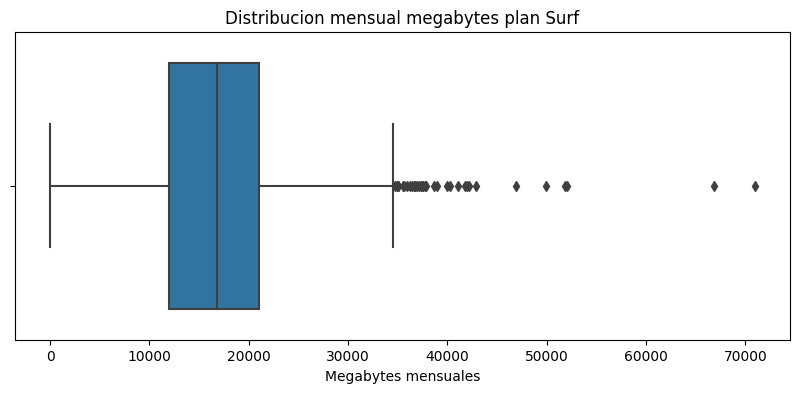

In [54]:
# Traza un diagrama de caja para visualizar la distribución de la cantidad mensual de megabytes
plt.figure(figsize=(10,4))
sns.boxplot(df_consumo_final[df_consumo_final['plan_name'] == 'surf']['megabytes_user_monthly'])
plt.title('Distribucion mensual megabytes plan Surf')
plt.xlabel('Megabytes mensuales')

In [55]:
df_consumo_final[df_consumo_final['plan_name'] == 'surf']['megabytes_user_monthly'].describe()

count     1579.000000
mean     16495.364110
std       8062.925203
min          0.000000
25%      11968.600000
50%      16813.730000
75%      20993.075000
max      70931.590000
Name: megabytes_user_monthly, dtype: float64

Por medio de .describe se observan los valores exactos de los cuartiles y de los valores mínimos y máximos. La caja es de un tamaño relativamente pequeño, con valores que van un poco sobre 11000 y luego sobrepasa un poco los 20000.Esto es lo que la mayoria de cliemtes consumen de megabytes mensualmente.

El límite del plan Surf es 15,000 MB, pero el diagrama de caja va estimadamente de 11,000 a 21,000 MB. Esto significa que el 25% de usuarios consume menos megabytes del límite incluido y el 75% de usuarios excede su límite y paga extra, generando mayor ingreso a la empresa Megaline.

Text(0.5, 0, 'Megabytes mensuales')

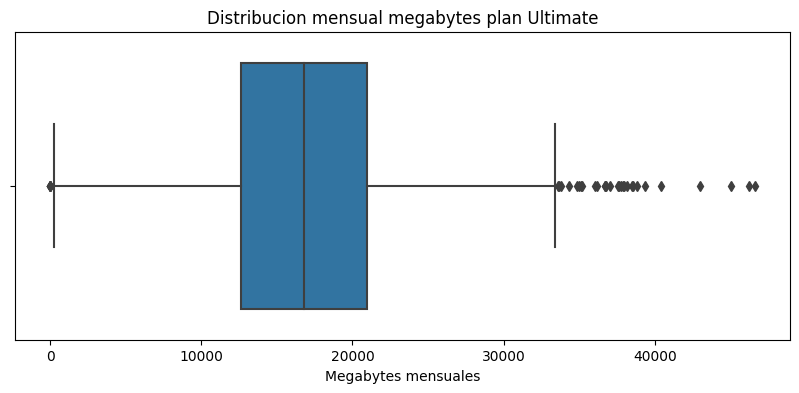

In [56]:
# Traza un diagrama de caja para visualizar la distribución de la cantidad mensual de megabytes
plt.figure(figsize=(10,4))
sns.boxplot(df_consumo_final[df_consumo_final['plan_name'] == 'ultimate']['megabytes_user_monthly'])
plt.title('Distribucion mensual megabytes plan Ultimate')
plt.xlabel('Megabytes mensuales')

In [57]:
df_consumo_final[df_consumo_final['plan_name'] == 'ultimate']['megabytes_user_monthly'].describe()

count      724.000000
mean     17119.590856
std       7933.579156
min          0.000000
25%      12617.490000
50%      16796.740000
75%      20966.662500
max      46595.330000
Name: megabytes_user_monthly, dtype: float64

Lan distribución que se observa en este diagrama es casi simétrica, los espacios entre el bigote inferior y Q1 y entre Q3 y el bigote superior son similares. La caja parece tambien estar equilibrada, y presenta múltiples valores atípicos superiores, que son los usuarios que exceden significativamente el consumo típico. En este caso si se observa que el comportamiento de los usuarios si depende del plan que están utilizando. Por emdio de describe se ppuede ver los valores exactos de los cuartiles, habiendo una diferencia entre ellos de aproximadamente 4mil megabytes. Coincide con un comportamiento de consumo un poco más estable entre lso usuarios no tan disperso. En ambos casos hay varios usuarios que consumen más internet del que está incluido en su plan lo que genera un mayor ingreso para Megaline.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Gracias a estos analisis podemos crear nuevas estrategias para optimizar los planes y dar un mayor beneficio a cambio de mejores ingresos
</div>


## Ingreso

In [58]:
df_consumo_final['ingreso_mensual'] = ingreso_x_usuario

plan_name
surf        90243.122338
ultimate    52203.577344
Name: ingreso_mensual, dtype: float64


<AxesSubplot:title={'center':'Total ingreso mensual'}, xlabel='plan_name', ylabel='Ingreso'>

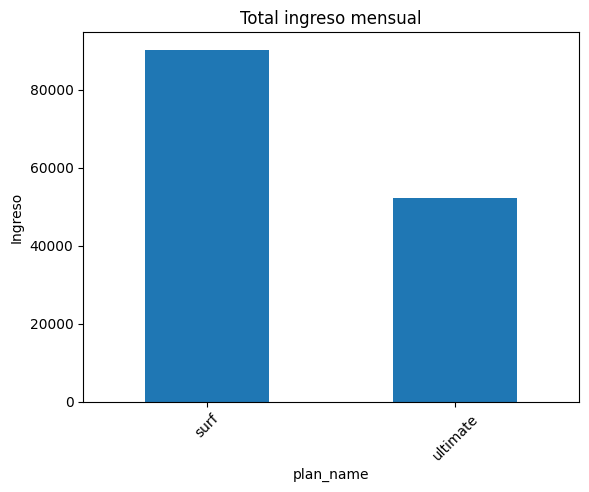

In [59]:
# Compara el ingreso mensual por usuarios por plan

total_ingreso = df_consumo_final.groupby('plan_name')['ingreso_mensual'].sum()

print(total_ingreso)
total_ingreso.plot(title= 'Total ingreso mensual', kind = 'bar', ylabel= 'Ingreso', rot=45)


A simple vista se nota que el ingreso del plan Surf es mucho mayor al ingreso del plan Ultimate. Con más de 57 millones en ingresos mensuales y más de 1.6 millones respectivamente. En el siguiente paso se analiza mejor este ingreso por cada plan. 

1       20.000000
2       20.000000
3       88.161191
4       50.706055
5       59.152148
          ...    
2295    20.000000
2298    20.000000
2299    20.000000
2300    20.000000
2302    20.000000
Name: ingreso_mensual, Length: 1579, dtype: float64


Text(0.5, 1.0, 'Ingreso mensual - Surf')

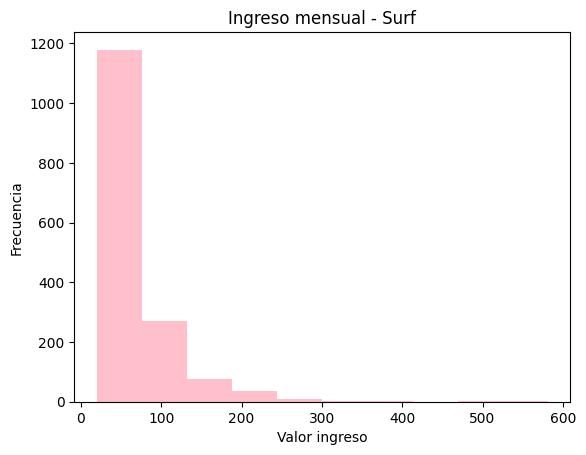

In [60]:
# Compara el ingreso total mensual que generan los usuarios de cada plan. Traza un histograma.

total_ingreso_surf = df_consumo_final[df_consumo_final['plan_name'] == 'surf']['ingreso_mensual']
print(total_ingreso_surf)

plt.hist(total_ingreso_surf, bins=10, color = 'pink')
plt.xlabel('Valor ingreso')
plt.ylabel('Frecuencia')
plt.title('Ingreso mensual - Surf')

Existe una concentración principal de al rededor de 1200 usuarios, los cuales generan entre 0-50,000 dólares para Megaline. Hay un segundo grupo que se conforma con al rededor de 300 usuarios, los cuales generan un ingreso de al rededor de 100,000 dólares. Se evidencia un sesgo a la derecha con valores atípicos de ingresos más altos.

0       70.000000
19      70.000000
20      79.562246
26      70.000000
27      70.000000
          ...    
2277    70.000000
2293    70.000000
2296    70.000000
2297    70.000000
2301    70.000000
Name: ingreso_mensual, Length: 724, dtype: float64


Text(0.5, 1.0, 'Ingreso mensual - Ultimate')

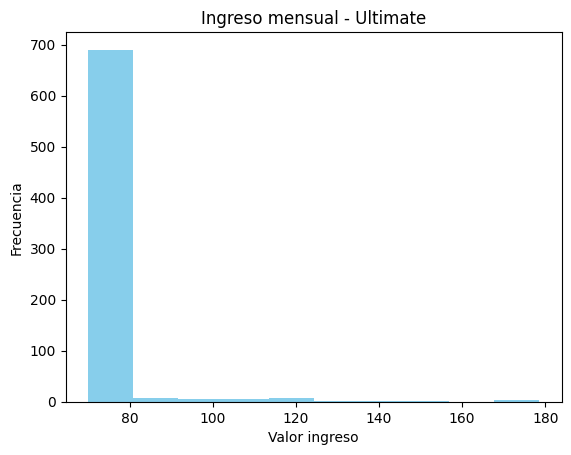

In [61]:
total_ingreso_ultimate = df_consumo_final[df_consumo_final['plan_name'] == 'ultimate']['ingreso_mensual']
print(total_ingreso_ultimate)

plt.hist(total_ingreso_ultimate, bins=10, color = 'skyblue')
plt.xlabel('Valor ingreso')
plt.ylabel('Frecuencia')
plt.title('Ingreso mensual - Ultimate')

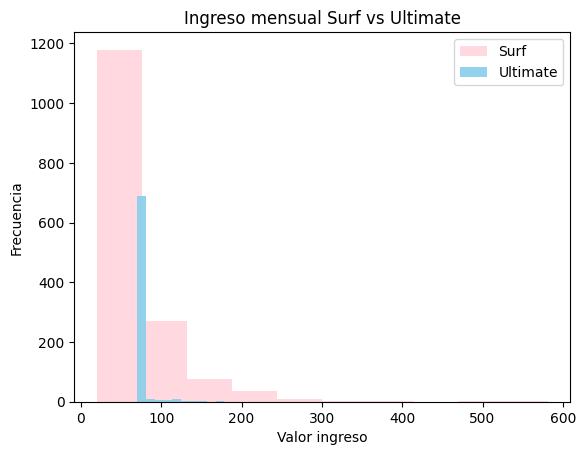

In [62]:
plt.hist(total_ingreso_surf, bins=10, color = 'pink', label='Surf', alpha=0.6)
plt.hist(total_ingreso_ultimate, bins=10, color = 'skyblue', label='Ultimate', alpha=0.9)
plt.xlabel('Valor ingreso')
plt.ylabel('Frecuencia')
plt.title('Ingreso mensual Surf vs Ultimate')
plt.legend()

Al observar el gráfico se nota una concentración extrema en valores bajos, la gran mayoría de usuarios Ultimate, al rededor de 700, generan ingresos entre 0 y 10,000 dólares, creando un pico muy pronunciado en el extremo inferior de la distribución
Después del primer intervalo, la frecuencia de usuarios disminuye drásticamente, siendo tan baja que apenas es visible en el gráfico, lo que indica una transición muy marcada entre usuarios de bajo y alto consumo
La distribución presenta un sesgo extremo hacia la derecha, con la mayoría absoluta de usuarios concentrados en el rango de ingresos más bajo pero con una presencia de valores atípicos. Se observan usuarios que generan ingresos superiores a los 100,000 dólares, representando casos de consumo extraordinariamente alto que contrastan fuertemente con el comportamiento típico que se ve en los usuarios de Ultimate.
A diferencia del plan Surf, Ultimate muestra un comportamiento mucho más uniforme, donde la mayoría de usuarios se mantiene dentro de los límites del plan sin generar excesos significativos.

In [63]:
# Calcula la media y la varianza del ingreso mensual de cada plan.

mean_surf=df_consumo_final[df_consumo_final['plan_name'] == 'surf']['ingreso_mensual'].mean()
mean_ultimate=df_consumo_final[df_consumo_final['plan_name'] == 'ultimate']['ingreso_mensual'].mean()

print(f"La media del ingreso mensual del plan Surf es {mean_surf}")
print(f"La media del ingreso mensual del plan Ultimate es {mean_ultimate}")

print()

variance_surf=df_consumo_final[df_consumo_final['plan_name'] == 'surf']['ingreso_mensual'].var()
variance_ultimate=df_consumo_final[df_consumo_final['plan_name'] == 'ultimate']['ingreso_mensual'].var()

print(f"La varianza del ingreso mensual del plan Surf es {variance_surf}")
print(f"La varianza del ingreso mensual del plan Ultimate es {variance_ultimate}")

La media del ingreso mensual del plan Surf es 57.152072411831064
La media del ingreso mensual del plan Ultimate es 72.10438859633979

La varianza del ingreso mensual del plan Surf es 2881.833930716757
La varianza del ingreso mensual del plan Ultimate es 115.35112331125603


Tomando en cuenta la media y la varianza de estos datos, se denota que la varianza de Surf etiene una dispersión extrema,  con más de 2 mil millones, y por otro aldo Ultimate, no es tan alta pero sigue siendo un número considerable con 120 miun poco más e 120 millones. En el plan Surf se ve que algunos usuarios gastan muy poco, cerca del plan que tienen de $20, hay otros que gastan en exceso y generan un ingreso de 10 dólares por GB, y el resultado de esto es que la distribución de estos datos empiece tan bajo entre 0 y 20 y que existan datos dispersos hasta valores extremos. 
En Ultimate, la mayoría de usuarios se agrupan en el límite del plan cerca de 70 dólares, también se observan unos pocos usuarios fuera del rango general, pero existe una menor dispersión. 

Text(0.5, 0, 'Valor ingreso')

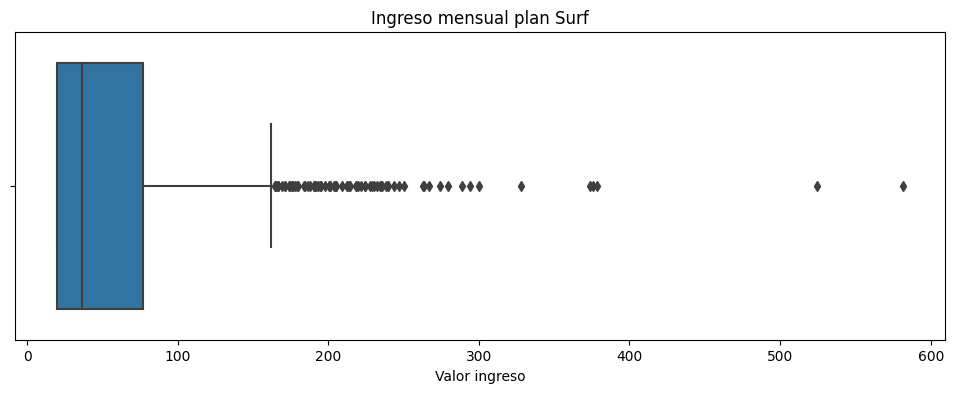

In [64]:
# Traza un diagrama de caja para visualizar la distribución del ingreso mensual

plt.figure(figsize=(12,4))
sns.boxplot(df_consumo_final[df_consumo_final['plan_name'] == 'surf']['ingreso_mensual'])
plt.title('Ingreso mensual plan Surf')
plt.xlabel('Valor ingreso')


In [65]:
df_consumo_final[df_consumo_final['plan_name'] == 'surf']['ingreso_mensual'].describe()

count    1579.000000
mean       57.152072
std        53.682715
min        20.000000
25%        20.000000
50%        36.552287
75%        76.818970
max       581.328509
Name: ingreso_mensual, dtype: float64

Se observa en el diagrama que la caja  es delgada, indicando que el rango intercuartílico (IQR) es pequeño, lo que significa que el 50% central de los datos está concentrado en un rango estrecho. No hay bigote inferior y Q1el valor mínimo y el 25% es igual, 20 dólares. La mediana muy cerca de Q1, con 36 dólares, y confirma que muchos usuarios tienen un consumo bajo
Por otro lado, Q3 es 76.81 dólares, el 75% de usuarios consume menos de esta cantidad. El espacio entre Q3 y bigote superior, muestra la distribución de los datos en el cuarto superior donde existen muchos valores atípicos por encima de 180 más o menos llegando a ser el más alto 581 dólares.

Text(0.5, 0, 'Valor ingreso')

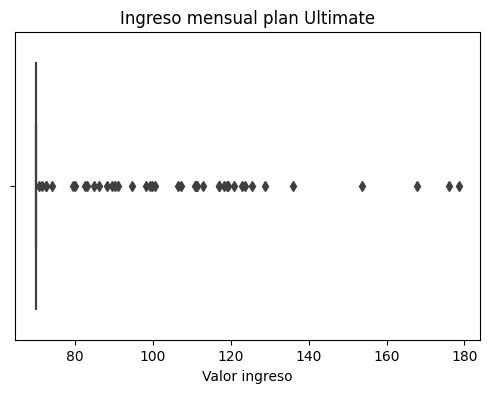

In [66]:
# Traza un diagrama de caja para visualizar la distribución del ingreso mensual
plt.figure(figsize=(6,4))
sns.boxplot(df_consumo_final[df_consumo_final['plan_name'] == 'ultimate']['ingreso_mensual'])
plt.title('Ingreso mensual plan Ultimate')
plt.xlabel('Valor ingreso')

In [67]:
df_consumo_final[df_consumo_final['plan_name'] == 'ultimate']['ingreso_mensual'].describe()

count    724.000000
mean      72.104389
std       10.740164
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      178.522764
Name: ingreso_mensual, dtype: float64

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Con las gráficas utilizadas podemos ver las diferencias más marcadas entre los planes, lo que nos ayuda a tomar mejores decisiones y mejorar el negocio
</div>


Este gráfico llama la atención a simple vista, ya que no se observa la caja como tal, pero Q1, Q2 Y Q3 son iguales, el 75% de usuarios Ultimate pagan exactamente 70 dólares, no exceden el límite de su plan. El 25% restante son los que generan ingresos adicionales entre 71 y 178 dólares. Los usuarios Ultimate son más conservadores en su consumo, el plan Ultimate está bien dimensionado para las necesidades de sus usuarios.

## Prueba las hipótesis estadísticas

La hipótesis nula es que NO son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.
La hipótesis alternativa es que SI hay diferencia entre los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.

In [68]:
# Prueba las hipótesis

ingresos_surf = df_consumo_final[df_consumo_final['plan_name'] == 'surf']['ingreso_mensual']
ingresos_ultimate = df_consumo_final[df_consumo_final['plan_name'] == 'ultimate']['ingreso_mensual']

results = st.ttest_ind(ingresos_surf, ingresos_ultimate)
alpha = .05

print('valor p: ', results.pvalue)

if (results.pvalue < alpha):
    print('Se rechaza la hipotesis nula, los ingresos SI son diferentes')
else:
    print('No se rechaza la hipotesis nula, no se evidencia diferencia entre los ingresos')


valor p:  1.5695898114081275e-13
Se rechaza la hipotesis nula, los ingresos SI son diferentes


La hipótesis nula es que el ingreso promedio de los usuarios del área NY-NJ, NO es diferente al de los usuarios de otras regiones.
La hipótesis alternativa es que el ingreso promedio de los usuarios del área NY-NJ, SI es diferente al de los usuarios de otras regiones.

In [69]:
# Prueba las hipótesis
area_ny_nj = ['New York', 'Newark', 'Jersey City']

df_users['region'] = df_users['city'].str.contains('New York-Newark-Jersey City', na=False)
df_users['region'] = df_users['region'].replace({True: 'NY-NJ', False: 'Other'})

df_consumo_region = df_consumo_final.merge(df_users[['user_id', 'region']], on='user_id', how='left')
ingresos_ny_nj = df_consumo_region[df_consumo_region['region'] == 'NY-NJ']['ingreso_mensual']
ingresos_regiones = df_consumo_region[df_consumo_region['region'] == 'Other']['ingreso_mensual']

print(f'Calculos estadisticos de Ingreso promedio del area NY-NJ')
print(f'La media del area de NY-NJ es de, {ingresos_ny_nj.mean()}')
print(f'La varianza del area de NY-NJ  es de, {ingresos_ny_nj.var()}')
print(f'La desviacion estandar del area de NY-NJ  es de, {ingresos_ny_nj.std()}')

print()

print(f'Calculos estadisticos de Ingreso promedio de otras regiones')
print(f'La media  de las otra regiones es de, {ingresos_regiones.mean()}')
print(f'La varianza de las otra regiones es de, {ingresos_regiones.var()}')
print(f'La desviacion estandar media de las otras regiones es de, {ingresos_regiones.std()}')

print() 

results = st.ttest_ind(ingresos_ny_nj, ingresos_regiones)
alpha = .05

print('valor p: ', results.pvalue)

if (results.pvalue < alpha):
    print('Se rechaza la hipotesis nula, los ingresos promedio SI son diferentes')
else:
    print('No se rechaza la hipotesis nula, no se evidencia diferencia entre los ingresos promedio')

Calculos estadisticos de Ingreso promedio del area NY-NJ
La media del area de NY-NJ es de, 57.22437196593915
La varianza del area de NY-NJ  es de, 1773.4714821396947
La desviacion estandar del area de NY-NJ  es de, 42.11260478929907

Calculos estadisticos de Ingreso promedio de otras regiones
La media  de las otra regiones es de, 62.76149978125
La varianza de las otra regiones es de, 2112.072041952898
La desviacion estandar media de las otras regiones es de, 45.957284971513474

valor p:  0.030084333712300265
Se rechaza la hipotesis nula, los ingresos promedio SI son diferentes


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

La aplicación de las pruebas de hipotesis me parece acertada, seleccionando los datos y valores correctos
</div>


## Conclusión general
# Primero se realiza una conclusión por plan:

Plan Surf ($20/mes):

Los usuarios muestran un comportamiento de consumo más variado, y exceden de manera frecuente los límites incluidos en su plan sobretodo de internet.
El 75% de usuarios excede el límite de internet de 15mil megabytes, generando ingresos adicionales significativos para Megaline. Consumo promedio de internet: 16,495 MB mensuales excediendo los 15GB incluidos y con muchos valores atípicos. Casi no usan sus mensajes, usan en promedio 31 mensajes de 50 incluidos. En cuanto a las llamadas hay un promedio de duración de 6.77 minutos. 


Plan Ultimate ($70/mes):

Los usuarios son más conservadores en el ocnsumo de lo que incluye su plan, el 75% de usuarios paga exactamente 70 dólares, manteniéndose dentro de los límites del plan. Su consumo promedio de internet es de 17,119 MB mensuales, dentro del límite de 30,720 MB. Los usuarios del plan Ultimate hacen llamadas de un promedio de 6.70 minutos, y subutilizan de forma extrema los mensajes incluidos con un uso de 37 de 1000 incluidos.

El consumo de Internet es el servicio más utilizadode ambos planes y el principal generador de ingresos adicionales, especialmente en el plan Surf.

# Se revisa los resultados obtenidos con las pruebas de hipótesis:

Se rechazó la hipótesis nula (p < 0.05), confirmando que SÍ existe diferencia significativa en los ingresos promedio entre los planes Surf y Ultimate.

Se rechazó la hipótesis nula (p = 0.030), confirmando que SÍ existe diferencia significativa entre los ingresos de usuarios de NY-NJ versus otras regiones.

# Qué significa esto para Megaline?

El plan Surf genera mayores ingresos totales, con 90,243 dólares a diferencia de Ultimate que genera 52,204 dólares. Esto se debe a que Surf tiene un mayor número de usuarios excediendo límites, su tarifa por exceso en GB es más alta con 10 dólares. Hya un comportamiento más variable entre sus usuarios, habiendo clientes que usan poco, medio y varios que se exceden,
Como se indicó anteriormente, los usuarios de Surf, al pagar menos mensualmente, están más dispuestos a exceder límites, mientras que los de Ultimate son más conscientes del gasto al ya pagar una tarifa alta mensualmente. 

Estas son las cosideraciones a tomar en cuenta por el departamento comercial para que puedan ajustar el presupuesto de publicidad y enfocarse en las estrategias necesarias para sus usuario y planes.


## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un muy buen trabajo al desarrollar este proyecto, las observaciones que has hecho a lo largo del mismo han servido para tomar acción en los pasos posteriores, terminando en resultados positivos.

Este es un proyecto que nos adentra mucho en los analisis que se hacen recurrentemente en las compañías donde se obtiene información para tomar decisiones sobre el negocio que impactan directamente los ingresos, lo has hecho bastante bien!

Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!    
</div>


<div class="alert alert-block alert-success">
<b>Aspectos positivos del proyecto</b> <a class="tocSkip"></a><br />

- Las observaciones intermedias, así como las conclusiones finales me parecen buenas
- Las graficas utilizadas me parecen del tipo correcto
- Se mantuvo una consistencia similar en las distintas secciones del proyecto
- Se revisaron detalles muy minuciosamente con bastante cuidado    
</div>
